<a href="https://colab.research.google.com/github/NMNayan57/Newcolab-file/blob/main/Python_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive mount

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Relevant Libraries Import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:

file_path = '/content/drive/MyDrive/Mediatec solution/Resume/Resume.csv'
df = pd.read_csv(file_path)




# **Data Exploration and Preprocessing**

In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
# Check the distribution of categories in the dataset
category_distribution = df['Category'].value_counts()
category_distribution


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

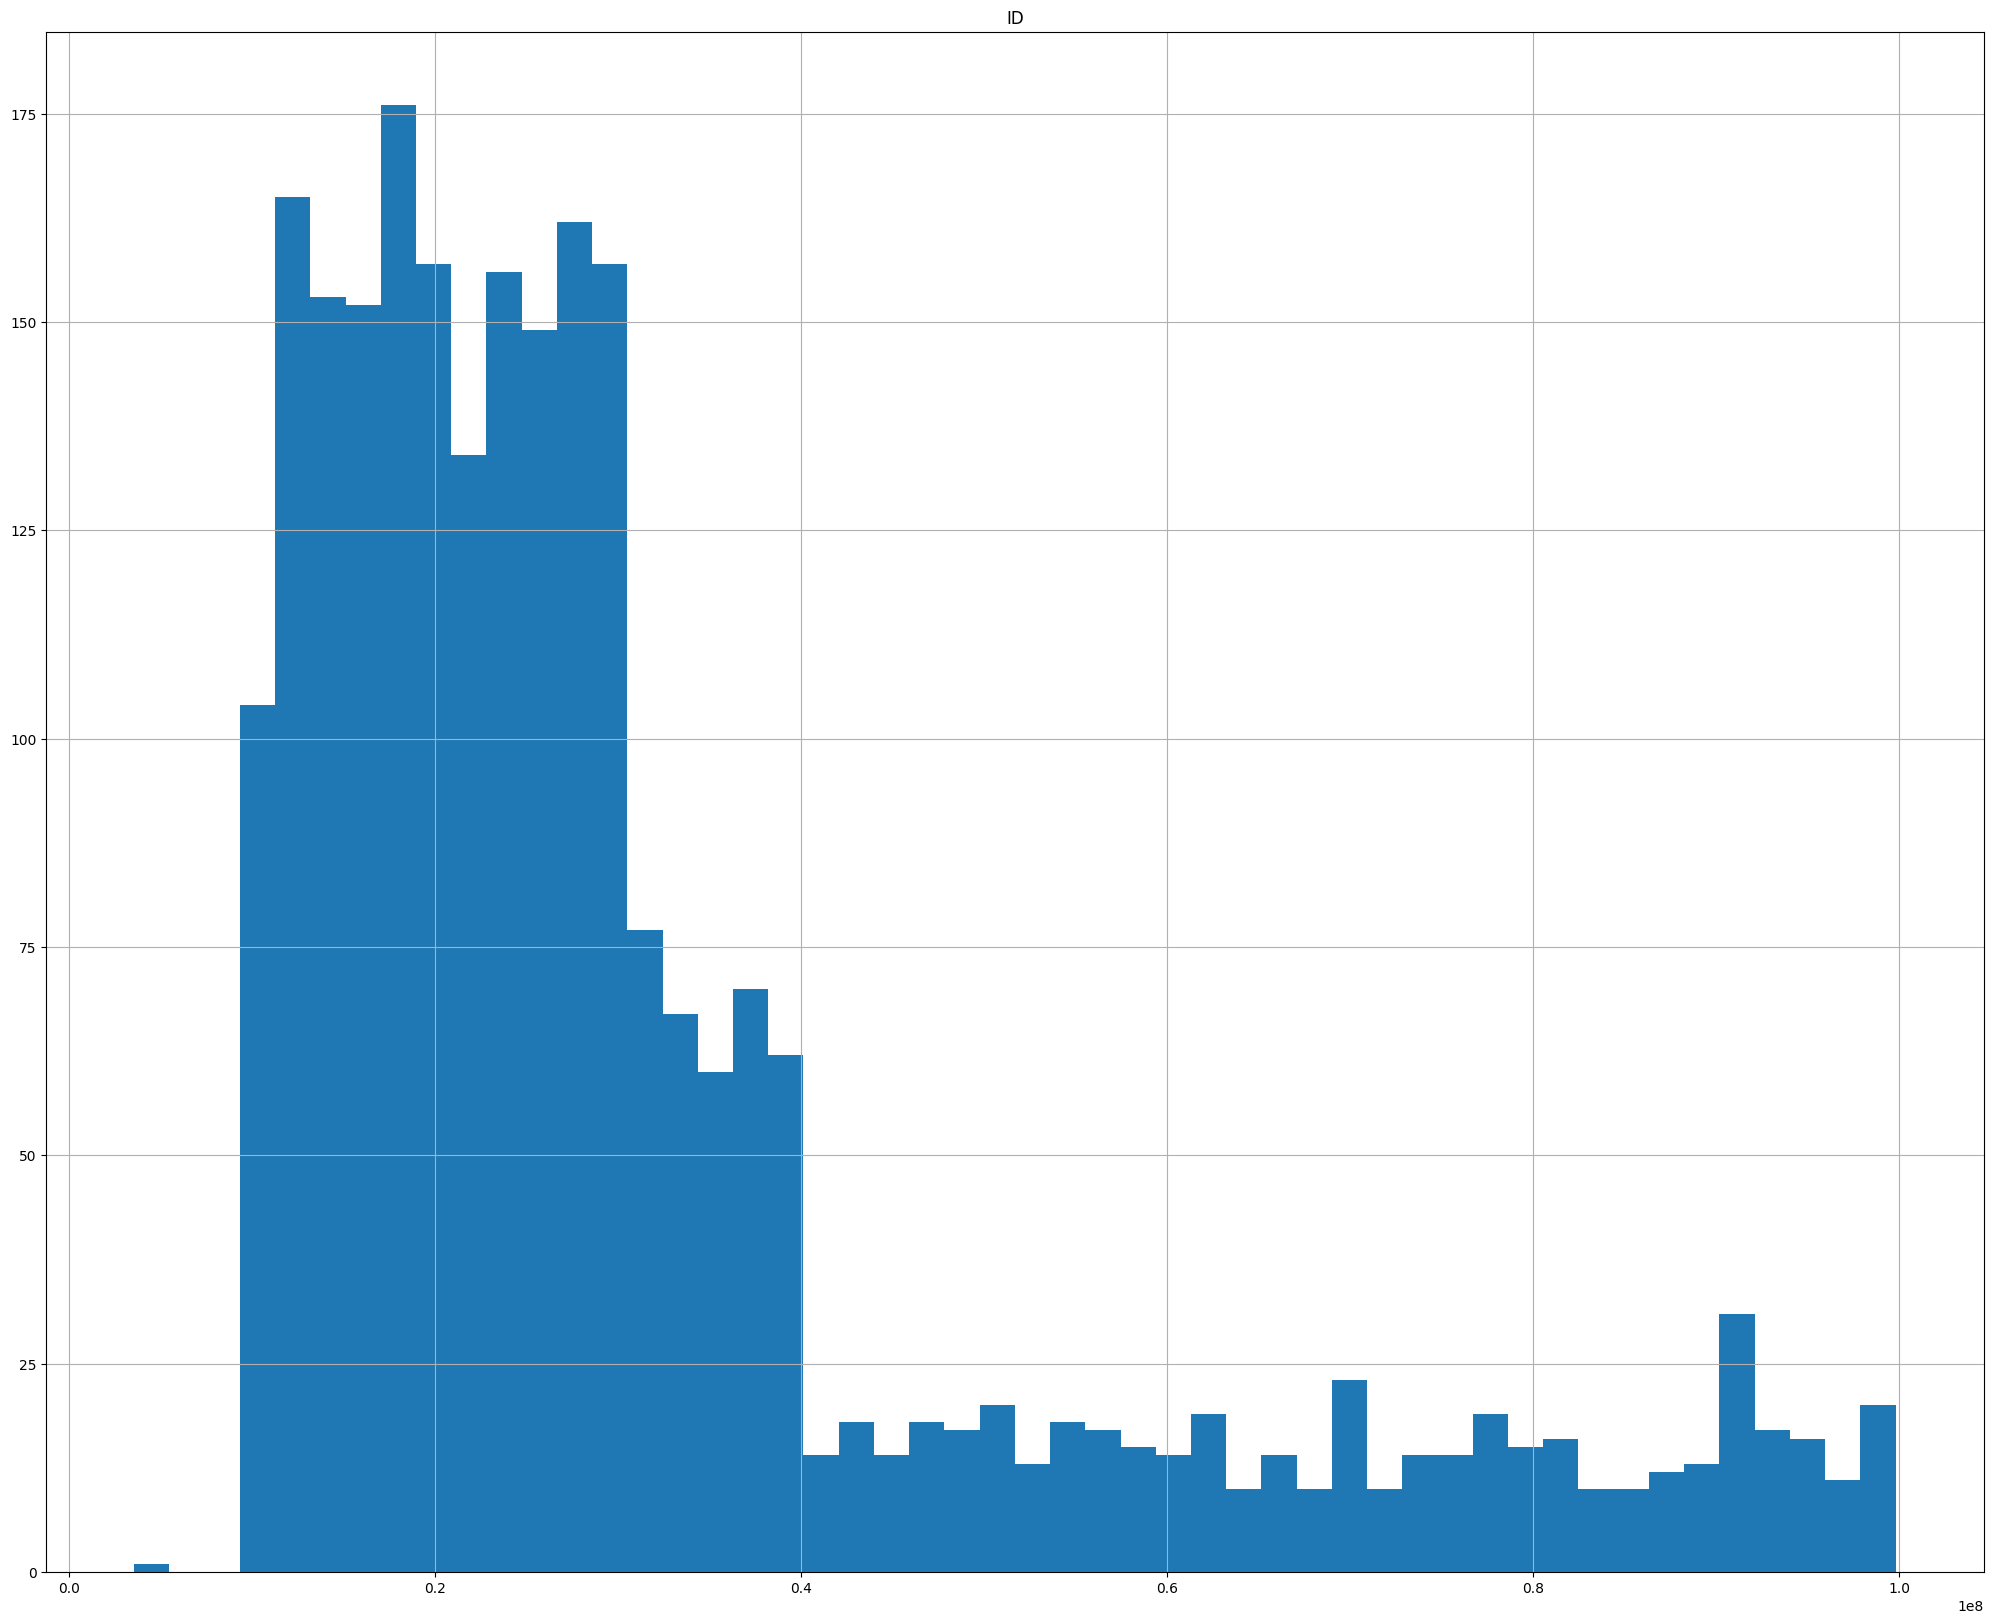

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [ ]:
# Calculate the length of each resume in characters
df['Resume_Length'] = df['Resume_str'].apply(len)

# Calculate basic statistics
average_length = df['Resume_Length'].mean()
min_length = df['Resume_Length'].min()
max_length = df['Resume_Length'].max()
percentile_25 = df['Resume_Length'].quantile(0.25)
percentile_50 = df['Resume_Length'].quantile(0.50)
percentile_75 = df['Resume_Length'].quantile(0.75)


In [ ]:
# Print the statistics
print(f"Average length of a resume: ~{average_length:.0f} characters.")
print(f"Minimum length: {min_length} characters.")
print(f"Maximum length: {max_length} characters.")
print(f"25th percentile: {percentile_25} characters.")
print(f"50th percentile: {percentile_50} characters.")
print(f"75th percentile: {percentile_75} characters.")


Average length of a resume: ~6295 characters.
Minimum length: 21 characters.
Maximum length: 38842 characters.
25th percentile: 5160.0 characters.
50th percentile: 5886.5 characters.
75th percentile: 7227.25 characters.


In [ ]:
resume_length_stats = df['Resume_str'].apply(len).describe()
resume_length_stats


count     2484.000000
mean      6295.308776
std       2769.251458
min         21.000000
25%       5160.000000
50%       5886.500000
75%       7227.250000
max      38842.000000
Name: Resume_str, dtype: float64

In [ ]:
df.describe()

,ID,Resume_Length
count,2.484000e+03,2484.000000
mean,3.182616e+07,6295.308776
std,2.145735e+07,2769.251458
min,3.547447e+06,21.000000
25%,1.754430e+07,5160.000000
50%,2.521031e+07,5886.500000
75%,3.611444e+07,7227.250000
max,9.980612e+07,38842.000000


In [ ]:


missing_values = df.isnull().sum()

missing_values

ID               0
Resume_str       0
Resume_html      0
Category         0
Resume_Length    0
dtype: int64

In [ ]:

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             2484 non-null   int64 
 1   Resume_str     2484 non-null   object
 2   Resume_html    2484 non-null   object
 3   Category       2484 non-null   object
 4   Resume_Length  2484 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 97.2+ KB


In [ ]:


import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and other cleaning tools
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_resume(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return " ".join(words)

# Apply cleaning function to Resume_str column
df['Cleaned_Resume'] = df['Resume_str'].apply(clean_resume)

# Show the first few rows of the cleaned dataset
df[['Resume_str', 'Cleaned_Resume', 'Category']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Resume_str,Cleaned_Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administratormarketing associate hr adminis...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versati...,HR
2,HR DIRECTOR Summary Over 2...,hr director summary years experience recruitin...,HR
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...,HR
4,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depar...,HR


**another way of cleaning data**


In [ ]:
# some basic list of common stopwords
basic_stopwords = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
}

# Function to clean the text without using NLTK stopwords
def clean_resume_basic(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in basic_stopwords]
    # Join words back into a single string
    return " ".join(words)

# Apply the basic cleaning function to the Resume_str column
df['Cleaned_Resume'] = df['Resume_str'].apply(clean_resume_basic)

# Show the first few rows of the cleaned dataset
df[['Resume_str', 'Cleaned_Resume', 'Category']].head()


,Resume_str,Cleaned_Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administratormarketing associate hr adminis...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versati...,HR
2,HR DIRECTOR Summary Over 2...,hr director summary years experience recruitin...,HR
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...,HR
4,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depar...,HR


**Feature Extraction Using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['Cleaned_Resume'])




**Label encoder**

In [ ]:
# Convert the target category to numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])

In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category,Resume_Length,Cleaned_Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,5442,hr administratormarketing associate hr adminis...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,5572,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,7720,hr director summary years experience recruitin...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,2855,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,9172,hr manager skill highlights hr skills hr depar...


**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


**Model Training**

In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Validation Classification Report:\n", classification_report(y_val, y_pred_val))


Validation Accuracy: 0.6193029490616622
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.55      0.64      0.59        28
           2       1.00      0.22      0.36         9
           3       0.44      0.36      0.40        11
           4       0.09      0.08      0.09        12
           5       0.00      0.00      0.00         8
           6       0.78      0.78      0.78        18
           7       0.82      0.69      0.75        13
           8       0.00      0.00      0.00         2
           9       0.65      0.59      0.62        22
          10       0.88      0.70      0.78        20
          11       0.92      0.80      0.86        15
          12       0.22      0.25      0.24         8
          13       0.82      0.64      0.72        14
          14       0.93      0.61      0.74        23
          15       0.38      0.62      0.47        13
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Validation Classification Report:\n", classification_report(y_val, y_pred_rf))


Random Forest Validation Accuracy: 0.6729222520107239
Random Forest Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       0.92      0.82      0.87        28
           2       0.67      0.22      0.33         9
           3       0.50      0.27      0.35        11
           4       0.25      0.08      0.12        12
           5       0.00      0.00      0.00         8
           6       0.73      0.89      0.80        18
           7       0.56      0.69      0.62        13
           8       0.00      0.00      0.00         2
           9       0.60      0.55      0.57        22
          10       0.79      0.75      0.77        20
          11       0.81      0.87      0.84        15
          12       0.60      0.38      0.46         8
          13       0.92      0.86      0.89        14
          14       0.83      0.65      0.73        23
          15       0.40      0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_val)

print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Decision Tree Validation Classification Report:\n", classification_report(y_val, y_pred_dt))


Decision Tree Validation Accuracy: 0.5656836461126006
Decision Tree Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.69      0.71      0.70        28
           2       0.00      0.00      0.00         9
           3       0.19      0.27      0.22        11
           4       0.27      0.33      0.30        12
           5       0.00      0.00      0.00         8
           6       0.70      0.78      0.74        18
           7       0.27      0.23      0.25        13
           8       0.20      0.50      0.29         2
           9       0.44      0.36      0.40        22
          10       0.94      0.75      0.83        20
          11       0.65      0.73      0.69        15
          12       0.33      0.50      0.40         8
          13       0.76      0.93      0.84        14
          14       0.50      0.43      0.47        23
          15       0.38      0.3

In [ ]:
import xgboost as xgb


In [ ]:

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Validation Classification Report:\n", classification_report(y_val, y_pred_xgb))


XGBoost Validation Accuracy: 0.739946380697051
XGBoost Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.82      0.82      0.82        28
           2       0.83      0.56      0.67         9
           3       0.44      0.36      0.40        11
           4       0.45      0.42      0.43        12
           5       0.67      0.25      0.36         8
           6       0.83      0.83      0.83        18
           7       0.62      0.62      0.62        13
           8       0.33      0.50      0.40         2
           9       0.88      0.64      0.74        22
          10       1.00      0.80      0.89        20
          11       0.87      0.87      0.87        15
          12       0.62      0.62      0.62         8
          13       0.93      1.00      0.97        14
          14       0.89      0.70      0.78        23
          15       0.48      0.77      0.59  

***Hyperparameter tuining***

**Hyperparameter tuinning test**

In [ ]:

#from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#param_grid = {
    #'n_estimators': [100, 200, 300],
   # 'learning_rate': [0.01, 0.1, 0.2],
    #'max_depth': [3, 4, 5],
#}

# Create a GridSearchCV object
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

# Print the best parameters and best score
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

# Evaluate the model with the best parameters on the validation set
#best_model = grid_search.best_estimator_
#y_pred_best = best_model.predict(X_val)

#print("Best Model Validation Accuracy:", accuracy_score(y_val, y_pred_best))
#print("Best Model Validation Classification Report:\n", classification_report(y_val, y_pred_best))


**Model Evaluation**

In [ ]:

# Evaluate XGBoost on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print("XGBoost Test Classification Report:\n", classification_report(y_test, y_pred_test_xgb))


XGBoost Test Accuracy: 0.7184986595174263
XGBoost Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.78      0.78      0.78         9
           2       0.25      0.17      0.20         6
           3       0.64      0.50      0.56        18
           4       0.73      0.47      0.57        17
           5       0.40      0.67      0.50         3
           6       0.74      0.82      0.78        17
           7       0.75      0.56      0.64        16
           8       1.00      0.50      0.67         2
           9       0.50      0.31      0.38        13
          10       0.93      0.70      0.80        20
          11       0.79      0.79      0.79        28
          12       0.83      0.60      0.70        25
          13       0.77      0.89      0.83        19
          14       0.56      0.75      0.64        12
          15       0.70      0.82      0.76        17
  

In [ ]:
original_categories = list(set(y))


In [ ]:

for i in range(len(original_categories)):
  print("Before OverSampling, counts of label '{}': {} ".format(i, sum(y_train == i)))
print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))


Before OverSampling, counts of label '0': 81 
Before OverSampling, counts of label '1': 81 
Before OverSampling, counts of label '2': 48 
Before OverSampling, counts of label '3': 68 
Before OverSampling, counts of label '4': 74 
Before OverSampling, counts of label '5': 25 
Before OverSampling, counts of label '6': 82 
Before OverSampling, counts of label '7': 86 
Before OverSampling, counts of label '8': 18 
Before OverSampling, counts of label '9': 85 
Before OverSampling, counts of label '10': 78 
Before OverSampling, counts of label '11': 69 
Before OverSampling, counts of label '12': 82 
Before OverSampling, counts of label '13': 74 
Before OverSampling, counts of label '14': 61 
Before OverSampling, counts of label '15': 88 
Before OverSampling, counts of label '16': 83 
Before OverSampling, counts of label '17': 82 
Before OverSampling, counts of label '18': 85 
Before OverSampling, counts of label '19': 85 
Before OverSampling, counts of label '20': 77 
Before OverSampling, co

# **For class imbalance using SMOTE**

In [ ]:
pip install imblearn

In [ ]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

X_train_res, y_train_res = sm_over.fit_resample(X_train, y_train.ravel())

In [ ]:

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

for i in range(len(original_categories)):
  print("After OverSampling, counts of label '{}': {} ".format(i, sum(y_train_res == i)))


After OverSampling, the shape of train_X: (2112, 5000)
After OverSampling, the shape of train_y: (2112,) 

After OverSampling, counts of label '0': 88 
After OverSampling, counts of label '1': 88 
After OverSampling, counts of label '2': 88 
After OverSampling, counts of label '3': 88 
After OverSampling, counts of label '4': 88 
After OverSampling, counts of label '5': 88 
After OverSampling, counts of label '6': 88 
After OverSampling, counts of label '7': 88 
After OverSampling, counts of label '8': 88 
After OverSampling, counts of label '9': 88 
After OverSampling, counts of label '10': 88 
After OverSampling, counts of label '11': 88 
After OverSampling, counts of label '12': 88 
After OverSampling, counts of label '13': 88 
After OverSampling, counts of label '14': 88 
After OverSampling, counts of label '15': 88 
After OverSampling, counts of label '16': 88 
After OverSampling, counts of label '17': 88 
After OverSampling, counts of label '18': 88 
After OverSampling, counts of

Our target class is imbalanced, so we need to balance the classes. For this purpose, we use Synthetic Minority Over-sampling Technique(SMOTE), which is a well-known technique for data balancing.

In [ ]:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train XGBoost on the resampled data
xgb_model_resampled = xgb.XGBClassifier(random_state=42)
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluate XGBoost on the validation set
y_pred_val_resampled = xgb_model_resampled.predict(X_val)

print("XGBoost Validation Accuracy (after SMOTE):", accuracy_score(y_val, y_pred_val_resampled))
print("XGBoost Validation Classification Report (after SMOTE):\n", classification_report(y_val, y_pred_val_resampled))


XGBoost Validation Accuracy (after SMOTE): 0.7453083109919572
XGBoost Validation Classification Report (after SMOTE):
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.83      0.89      0.86        28
           2       0.57      0.44      0.50         9
           3       0.36      0.36      0.36        11
           4       0.50      0.50      0.50        12
           5       0.20      0.12      0.15         8
           6       0.75      0.83      0.79        18
           7       0.62      0.62      0.62        13
           8       0.33      0.50      0.40         2
           9       0.88      0.64      0.74        22
          10       1.00      0.85      0.92        20
          11       0.74      0.93      0.82        15
          12       0.75      0.75      0.75         8
          13       0.93      1.00      0.97        14
          14       0.95      0.78      0.86        23
          15    

**one deep learning method to see how it work and its accuracy**

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the deep learning model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

# Generate predictions
y_pred_dl = model.predict(X_test)
y_pred_dl = np.argmax(y_pred_dl, axis=1)

# Print classification report
print("Deep Learning Test Classification Report:\n", classification_report(y_test, y_pred_dl))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.1536 - loss: 3.1032 - val_accuracy: 0.4397 - val_loss: 2.4474
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4982 - loss: 2.0472 - val_accuracy: 0.5710 - val_loss: 1.6804
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7473 - loss: 1.0757 - val_accuracy: 0.5791 - val_loss: 1.4975
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8545 - loss: 0.5864 - val_accuracy: 0.5657 - val_loss: 1.4524
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9269 - loss: 0.3602 - val_accuracy: 0.5764 - val_loss: 1.4443
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9723 - loss: 0.1704 - val_accuracy: 0.5818 - val_loss: 1.4615
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9898 - loss: 0.1088 - val_accuracy: 0.6059 - val_loss: 1.4713
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9918 - loss: 0.0709 - val_accuracy: 0.5952 - v

# Result visualization  using Explainable AI (XAI)

In [ ]:
pip install shap

In [ ]:
import shap


In [ ]:
explainer = shap.TreeExplainer(xgb_model_resampled)
shap_values = explainer.shap_values(X_val)
expected_value = explainer.expected_value



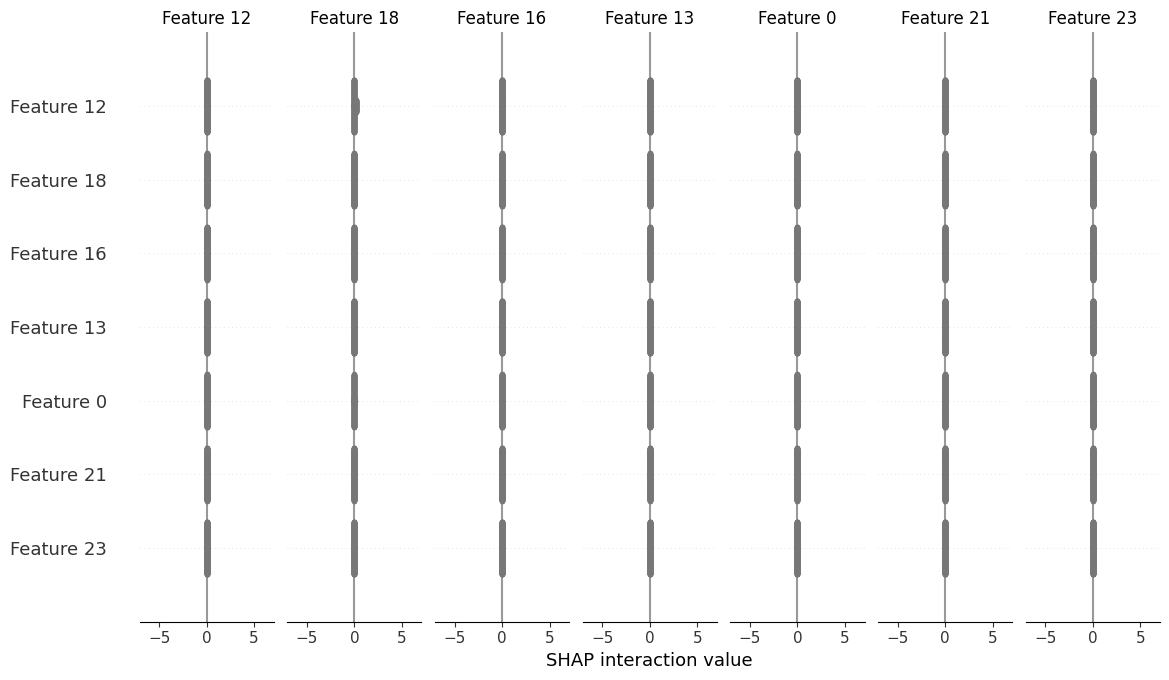

In [ ]:
shap.summary_plot(shap_values, X_val,title="SHAP summary plot")

**Evaluate the model's performance using the validation set and refine for accuracy and efficiency.**

> accuracy was 75% for xgb that was best among them.





In [ ]:

# Evaluate XGBoost (trained on resampled data) on the test set
y_pred_test_resampled = xgb_model_resampled.predict(X_test)

print("XGBoost Test Accuracy (after SMOTE):", accuracy_score(y_test, y_pred_test_resampled))
print("XGBoost Test Classification Report (after SMOTE):\n", classification_report(y_test, y_pred_test_resampled))


XGBoost Test Accuracy (after SMOTE): 0.7184986595174263
XGBoost Test Classification Report (after SMOTE):
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.80      0.89      0.84         9
           2       0.25      0.17      0.20         6
           3       0.67      0.56      0.61        18
           4       0.67      0.47      0.55        17
           5       0.20      0.33      0.25         3
           6       0.88      0.82      0.85        17
           7       0.64      0.56      0.60        16
           8       1.00      0.50      0.67         2
           9       0.50      0.31      0.38        13
          10       0.94      0.75      0.83        20
          11       0.83      0.89      0.86        28
          12       0.73      0.64      0.68        25
          13       0.77      0.89      0.83        19
          14       0.60      0.75      0.67        12
          15       0.76     

In [ ]:
pip install joblib

In [ ]:
pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader


In [ ]:

# Save the model and vectorizer to disk
joblib.dump(xgb_model_resampled, 'trained_model.pkl') #Hence we get best accury from XGB after using SMOTE
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

# **SCript**

In [ ]:
import joblib
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from PyPDF2 import PdfReader

# Function to convert PDF to text
def pdf_to_text(file_path):
    text = ""
    try:
        with open(file_path, 'rb') as file:
            pdf_reader = PdfReader(file)
            for page in pdf_reader.pages:
                text += page.extract_text()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
    return text

# Load the trained model and vectorizer
model = joblib.load('trained_model .pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Define the input directory for the new resumes for each category
input_dir = "/content/drive/MyDrive/Mediatec solution/ACCOUNTANT"

# Process each file in the directory
results = []
for filename in os.listdir(input_dir):
    if filename.endswith(".pdf"):
        filepath = os.path.join(input_dir, filename)
        # Convert PDF to text using the defined function
        resume_text = pdf_to_text(filepath)
        # Check if clean_resume_basic function is available
        if 'clean_resume_basic' in globals():
            cleaned_resume = clean_resume_basic(resume_text)
        else:
            cleaned_resume = resume_text  # Use raw text if cleaning function is not defined
            print("Warning: 'clean_resume_basic' function not found. Using raw resume text.")
        features = vectorizer.transform([cleaned_resume])
        predicted_category = model.predict(features)[0]

        # Convert the predicted category to a string
        predicted_category = str(predicted_category)

        # Create category folder if not exists
        category_dir = os.path.join(input_dir, predicted_category)
        os.makedirs(category_dir, exist_ok=True)

        # Move the file to the category folder
        os.rename(filepath, os.path.join(category_dir, filename))

        # Append result for CSV output
        results.append({"filename": filename, "category": predicted_category})

# Save the results to a CSV file
if results:  # Check if any resumes were processed
    output_csv = pd.DataFrame(results)
    output_csv.to_csv('categorized_resumes_ACCOUNTANT.csv', index=False)
    print("'categorized_resumes_ACCOUNTANT.csv' created successfully.")
else:
    print("No resumes were processed. Check file paths and processing logic.")

'categorized_resumes_ACCOUNTANT.csv' created successfully.
